<a href="https://colab.research.google.com/github/Kuzay3t/Wells_classification/blob/main/spe_trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd

wells_df = pd.read_csv('spe_africa_dseats_datathon_2025_wells_dataset.csv')
params_df = pd.read_csv('classification_parameters.csv')
truth_df = pd.read_csv('Innovisors_DSEATS_Africa_2025_Classification.csv')

In [ ]:
# Clean up column names for consistency
params_df.columns = [col.strip().replace(' ', '_') for col in params_df.columns]
truth_df.columns = [col.strip().replace(' ', '_') for col in truth_df.columns]
wells_df.columns = [col.strip().replace(' ', '_') for col in wells_df.columns]

In [ ]:
# Strip and normalize column headers
for df in [wells_df, params_df, truth_df]:
    df.columns = [col.strip().replace(' ', '_').upper() for col in df.columns]

In [ ]:
# Extract well IDs if they're in the format 'Well_#1'
wells_df['WELL_ID'] = wells_df['WELL_NAME'].str.extract(r'#(\d+)').astype(float)

# Merge truth labels by ID
wells_df = wells_df.merge(truth_df, left_on='WELL_ID', right_on='WELL', how='left', suffixes=('', '_TRUTH'))

In [ ]:
print(wells_df.columns.tolist())

['PROD_DATE', 'WELL_NAME', 'ON_STREAM_HRS', 'BOTTOMHOLE_FLOWING_PRESSURE_(PSI)', 'DOWNHOLE_TEMPERATURE_(DEG_F)', 'ANNULUS_PRESS_(PSI)', 'CHOKE_SIZE_(%)', 'WELL_HEAD_PRESSURE_(PSI)', 'WELL_HEAD_TEMPERATURE_(DEG_F)', 'CUMULATIVE_OIL_PROD_(STB)', 'CUMULATIVE_FORMATION_GAS_PROD_(MSCF)', 'CUMULATIVE_TOTAL_GAS_PROD_(MSCF)', 'CUMULATIVE_WATER_PROD_(BBL)', 'WELL_ID', 'WELL', 'RESERVOIR_NAME', 'RESERVOIR_TYPE', 'WELL_TYPE', 'PRODUCTION_TYPE', 'FORMATION_GOR_TREND', 'WATERCUT_TREND', 'OIL_PRODUCTIVITY_INDEX']


In [ ]:
print(wells_df.columns.tolist())

['PROD_DATE', 'WELL_NAME', 'ON_STREAM_HRS', 'BOTTOMHOLE_FLOWING_PRESSURE_(PSI)', 'DOWNHOLE_TEMPERATURE_(DEG_F)', 'ANNULUS_PRESS_(PSI)', 'CHOKE_SIZE_(%)', 'WELL_HEAD_PRESSURE_(PSI)', 'WELL_HEAD_TEMPERATURE_(DEG_F)', 'CUMULATIVE_OIL_PROD_(STB)', 'CUMULATIVE_FORMATION_GAS_PROD_(MSCF)', 'CUMULATIVE_TOTAL_GAS_PROD_(MSCF)', 'CUMULATIVE_WATER_PROD_(BBL)', 'WELL_ID', 'WELL', 'RESERVOIR_NAME', 'RESERVOIR_TYPE', 'WELL_TYPE', 'PRODUCTION_TYPE', 'FORMATION_GOR_TREND', 'WATERCUT_TREND', 'OIL_PRODUCTIVITY_INDEX']


In [ ]:
final_cols = [
    'WELL_NAME',
    'RESERVOIR_NAME',
    'RESERVOIR_TYPE',
    'WELL_TYPE',
    'FORMATION_GOR_TREND',
    'WATERCUT_TREND',
    'OIL_PRODUCTIVITY_INDEX'
]

submission_df = wells_df[final_cols]
submission_df.to_csv('Innovisors_Classification_Submission.csv', index=False)

In [ ]:
final_cols = [
    'WELL_NAME',
    'RESERVOIR_NAME',
    'RESERVOIR_TYPE',
    'WELL_TYPE',
    'FORMATION_GOR_TREND',
    'WATERCUT_TREND',
    'OIL_PRODUCTIVITY_INDEX'
]

submission_df = wells_df[final_cols]

In [ ]:
submission_df.head()

,WELL_NAME,RESERVOIR_NAME,RESERVOIR_TYPE,WELL_TYPE,FORMATION_GOR_TREND,WATERCUT_TREND,OIL_PRODUCTIVITY_INDEX
0,Well_#1,KEMA,Saturated,GL,aSolGOR,Flat,Decr
1,Well_#1,KEMA,Saturated,GL,aSolGOR,Flat,Decr
2,Well_#1,KEMA,Saturated,GL,aSolGOR,Flat,Decr
3,Well_#1,KEMA,Saturated,GL,aSolGOR,Flat,Decr
4,Well_#1,KEMA,Saturated,GL,aSolGOR,Flat,Decr


In [ ]:
# Example standardization
trend_map = {
    'Increasing': 'Incr',
    'Flat': 'Flat',
    'Declining': 'Decl',
    'Unknown': 'Unknown'
}

submission_df['FORMATION_GOR_TREND'] = submission_df['FORMATION_GOR_TREND'].map(trend_map).fillna('Unknown')
submission_df['WATERCUT_TREND'] = submission_df['WATERCUT_TREND'].map(trend_map).fillna('Unknown')
submission_df['OIL_PRODUCTIVITY_INDEX'] = submission_df['OIL_PRODUCTIVITY_INDEX'].map(trend_map).fillna('Unknown')

/tmp/ipython-input-84-3203959299.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['FORMATION_GOR_TREND'] = submission_df['FORMATION_GOR_TREND'].map(trend_map).fillna('Unknown')
/tmp/ipython-input-84-3203959299.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['WATERCUT_TREND'] = submission_df['WATERCUT_TREND'].map(trend_map).fillna('Unknown')
/tmp/ipython-input-84-3203959299.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [ ]:
submission_df.to_csv('Innovisors_DSEATS_2025_Final_Classification.csv', index=False)

In [ ]:
# Load reservoir information
reservoir_df = pd.read_csv('reservoir_info.csv')

# Normalize column names
reservoir_df.columns = [col.strip().replace(' ', '_') for col in reservoir_df.columns]

# Uppercase reservoir names for mapping consistency
reservoir_df['Reservoir_Name'] = reservoir_df['Reservoir_Name'].str.strip().str.upper()

In [ ]:
print(reservoir_df.columns.tolist())

['Reservoir_Name', 'Initial_Reservoir_Pressure_(PSI)', 'Bubble_Point_Pressure_(PSI)', 'Current_Average_Reservoir_Pressure_(PSI)', 'Solution_Gas-Oil-Ratio_(SCF/BBL)', 'Formation_Volume_Factor_(RB/STB)']


In [ ]:
# Force numeric dtype — anything non-numeric becomes NaN
wells_df['CUMULATIVE_OIL_PROD_(STB)'] = pd.to_numeric(wells_df['CUMULATIVE_OIL_PROD_(STB)'], errors='coerce')

In [ ]:
print(wells_df['CUMULATIVE_OIL_PROD_(STB)'].isna().sum(), "non-numeric entries were coerced to NaN")

7534 non-numeric entries were coerced to NaN


In [ ]:
# Show a few corrupted rows
print(wells_df[wells_df['CUMULATIVE_OIL_PROD_(STB)'].isna()][['WELL_NAME', 'CUMULATIVE_OIL_PROD_(STB)']].head())

   WELL_NAME  CUMULATIVE_OIL_PROD_(STB)
12   Well_#1                        NaN
13   Well_#1                        NaN
14   Well_#1                        NaN
15   Well_#1                        NaN
16   Well_#1                        NaN


In [ ]:
well1_oil = wells_df[wells_df['WELL_NAME'] == 'Well_#1']['CUMULATIVE_OIL_PROD_(STB)']
print(well1_oil.describe())
print(well1_oil.isna().sum(), "missing out of", len(well1_oil), "entries for Well_#1")

count     12.000000
mean      52.583333
std      182.154010
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      631.000000
Name: CUMULATIVE_OIL_PROD_(STB), dtype: float64
192 missing out of 204 entries for Well_#1


In [ ]:
# Get the reservoir assigned to Well_#1
well1_reservoir = wells_df[wells_df['WELL_NAME'] == 'Well_#1']['RESERVOIR_NAME'].iloc[0]

# Calculate reservoir-wide median oil
res_median_oil = wells_df[wells_df['RESERVOIR_NAME'] == well1_reservoir]['CUMULATIVE_OIL_PROD_(STB)'].median()

# Impute into Well_#1
wells_df.loc[wells_df['WELL_NAME'] == 'Well_#1', 'CUMULATIVE_OIL_PROD_(STB)'] = res_median_oil

In [ ]:
# Build mapping from reservoir info
fvf_map = reservoir_df.set_index('Reservoir_Name')['Formation_Volume_Factor_(RB/STB)'].to_dict()

# Ensure reservoir names are uppercase for matching
wells_df['RESERVOIR_NAME'] = wells_df['RESERVOIR_NAME'].str.strip().str.upper()

# Map FVF into wells_df
wells_df['FVF'] = wells_df['RESERVOIR_NAME'].map(fvf_map)

In [ ]:
# Reconfirm column presence
print(wells_df.columns.tolist())

# Convert production to numeric just in case
wells_df['CUMULATIVE_OIL_PROD_(STB)'] = pd.to_numeric(wells_df['CUMULATIVE_OIL_PROD_(STB)'], errors='coerce')

# Convert FVF to numeric too
wells_df['FVF'] = pd.to_numeric(wells_df['FVF'], errors='coerce')

['PROD_DATE', 'WELL_NAME', 'ON_STREAM_HRS', 'BOTTOMHOLE_FLOWING_PRESSURE_(PSI)', 'DOWNHOLE_TEMPERATURE_(DEG_F)', 'ANNULUS_PRESS_(PSI)', 'CHOKE_SIZE_(%)', 'WELL_HEAD_PRESSURE_(PSI)', 'WELL_HEAD_TEMPERATURE_(DEG_F)', 'CUMULATIVE_OIL_PROD_(STB)', 'CUMULATIVE_FORMATION_GAS_PROD_(MSCF)', 'CUMULATIVE_TOTAL_GAS_PROD_(MSCF)', 'CUMULATIVE_WATER_PROD_(BBL)', 'WELL_ID', 'WELL', 'RESERVOIR_NAME', 'RESERVOIR_TYPE', 'WELL_TYPE', 'PRODUCTION_TYPE', 'FORMATION_GOR_TREND', 'WATERCUT_TREND', 'OIL_PRODUCTIVITY_INDEX', 'FVF']


In [ ]:
print(wells_df[wells_df['RESERVOIR_NAME'] == 'KEMA'][['WELL_NAME', 'CUMULATIVE_OIL_PROD_(STB)', 'FVF']].head())

  WELL_NAME  CUMULATIVE_OIL_PROD_(STB)   FVF
0   Well_#1                        0.0  1.45
1   Well_#1                        0.0  1.45
2   Well_#1                        0.0  1.45
3   Well_#1                        0.0  1.45
4   Well_#1                        0.0  1.45


In [ ]:
# Compute median oil production for all wells in KEMA (excluding Well_#1 if needed)
kema_median_oil = wells_df[(wells_df['RESERVOIR_NAME'] == 'KEMA') & (wells_df['WELL_NAME'] != 'Well_#1')]['CUMULATIVE_OIL_PROD_(STB)'].median()

# Impute into Well_#1
wells_df.loc[wells_df['WELL_NAME'] == 'Well_#1', 'CUMULATIVE_OIL_PROD_(STB)'] = kema_median_oil

In [ ]:
wells_df['OIL_IN_BARRELS'] = wells_df['CUMULATIVE_OIL_PROD_(STB)'] * wells_df['FVF']

# Aggregate again
res_barrels = wells_df.groupby('RESERVOIR_NAME')['OIL_IN_BARRELS'].sum().round(2)
print("Updated Reservoir Barrels:\n", res_barrels)

Updated Reservoir Barrels:
 Series([], Name: OIL_IN_BARRELS, dtype: float64)


In [ ]:
print("Total wells assigned to KEMA:", wells_df[wells_df['RESERVOIR_NAME'] == 'KEMA']['WELL_NAME'].nunique())

Total wells assigned to KEMA: 1


In [ ]:
print("Total wells assigned to KEMA:", wells_df[wells_df['RESERVOIR_NAME'] == 'KEMA']['WELL_NAME'].nunique())

Total wells assigned to KEMA: 1


In [ ]:
# Pull mean oil from more productive reservoirs as proxy (e.g. JANI or DEPU)
fallback_res = 'JANI'  # or 'DEPU'
proxy_oil = wells_df[wells_df['RESERVOIR_NAME'] == fallback_res]['CUMULATIVE_OIL_PROD_(STB)'].median()

# Apply to Well_#1
wells_df.loc[wells_df['WELL_NAME'] == 'Well_#1', 'CUMULATIVE_OIL_PROD_(STB)'] = proxy_oil

In [ ]:
wells_df['OIL_IN_BARRELS'] = wells_df['CUMULATIVE_OIL_PROD_(STB)'] * wells_df['FVF']
res_barrels = wells_df.groupby('RESERVOIR_NAME')['OIL_IN_BARRELS'].sum().round(2)

In [ ]:
print(wells_df.columns.tolist())

['PROD_DATE', 'WELL_NAME', 'ON_STREAM_HRS', 'BOTTOMHOLE_FLOWING_PRESSURE_(PSI)', 'DOWNHOLE_TEMPERATURE_(DEG_F)', 'ANNULUS_PRESS_(PSI)', 'CHOKE_SIZE_(%)', 'WELL_HEAD_PRESSURE_(PSI)', 'WELL_HEAD_TEMPERATURE_(DEG_F)', 'CUMULATIVE_OIL_PROD_(STB)', 'CUMULATIVE_FORMATION_GAS_PROD_(MSCF)', 'CUMULATIVE_TOTAL_GAS_PROD_(MSCF)', 'CUMULATIVE_WATER_PROD_(BBL)', 'WELL_ID', 'WELL', 'RESERVOIR_NAME', 'RESERVOIR_TYPE', 'WELL_TYPE', 'PRODUCTION_TYPE', 'FORMATION_GOR_TREND', 'WATERCUT_TREND', 'OIL_PRODUCTIVITY_INDEX', 'FVF', 'OIL_IN_BARRELS']


In [ ]:
# Coerce to numeric, turning non-numeric entries into NaN
wells_df['CUMULATIVE_WATER_PROD_(BBL)'] = pd.to_numeric(wells_df['CUMULATIVE_WATER_PROD_(BBL)'], errors='coerce')
wells_df['CUMULATIVE_OIL_PROD_(STB)'] = pd.to_numeric(wells_df['CUMULATIVE_OIL_PROD_(STB)'], errors='coerce')

In [ ]:
wells_df['WATERCUT'] = wells_df['CUMULATIVE_WATER_PROD_(BBL)'] / (
    wells_df['CUMULATIVE_WATER_PROD_(BBL)'] + wells_df['CUMULATIVE_OIL_PROD_(STB)']
)

# Replace any invalid divisions with 0
wells_df['WATERCUT'] = wells_df['WATERCUT'].fillna(0)

In [ ]:
from scipy.stats import linregress
import numpy as np

# Dictionary to store classified trends
watercut_trends = {}

# Group by well
for well, group in wells_df.groupby('WELL_NAME'):
    group = group.sort_values('PROD_DATE')  # Make sure time ordering is correct

    x = np.arange(len(group))  # pseudo-time index
    y = group['WATERCUT'].values

    if len(np.unique(y)) <= 2:
        watercut_trends[well] = 'Flat'
        continue

    # Perform linear regression
    slope, _, r_value, _, _ = linregress(x, y)

    # Classify based on slope direction and R-correlation
    if abs(r_value) < 0.3:
        watercut_trends[well] = 'Combo'
    elif slope > 0:
        watercut_trends[well] = 'Increasing'
    elif slope < 0:
        watercut_trends[well] = 'Decreasing'
    else:
        watercut_trends[well] = 'Flat'

In [ ]:
submission_df['WATERCUT_TREND'] = submission_df['WELL_NAME'].map(watercut_trends)

/tmp/ipython-input-106-1528606681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['WATERCUT_TREND'] = submission_df['WELL_NAME'].map(watercut_trends)


In [ ]:
wells_df['CUMULATIVE_TOTAL_GAS_PROD_(MSCF)'] = pd.to_numeric(
    wells_df['CUMULATIVE_TOTAL_GAS_PROD_(MSCF)'], errors='coerce'
)

wells_df['CUMULATIVE_OIL_PROD_(STB)'] = pd.to_numeric(
    wells_df['CUMULATIVE_OIL_PROD_(STB)'], errors='coerce'
)

In [ ]:
wells_df['GOR'] = wells_df['CUMULATIVE_TOTAL_GAS_PROD_(MSCF)'] / wells_df['CUMULATIVE_OIL_PROD_(STB)']
wells_df['GOR'] = wells_df['GOR'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [ ]:
from scipy.stats import linregress
import numpy as np

gor_trends = {}

# Group wells and analyze GOR evolution
for well, group in wells_df.groupby('WELL_NAME'):
    group = group.sort_values('PROD_DATE')  # Ensure time ordering

    x = np.arange(len(group))
    y = group['GOR'].values

    # Early exit for flat or missing signal
    if len(np.unique(y)) <= 2:
        gor_trends[well] = 'aSolGOR'  # Physically stable GOR
        continue

    # Linear fit
    slope, _, r_value, _, _ = linregress(x, y)

    # Classification logic
    if abs(r_value) < 0.3:
        gor_trends[well] = 'Combo'
    elif slope < 0:
        gor_trends[well] = 'aSolGOR'  # GOR declining with pressure — expected
    elif slope > 0:
        gor_trends[well] = 'bSolGOR'  # GOR rising unexpectedly
    else:
        gor_trends[well] = 'aSolGOR'

In [ ]:
submission_df['FORMATION_GOR_TREND'] = submission_df['WELL_NAME'].map(gor_trends)

/tmp/ipython-input-110-3720291163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['FORMATION_GOR_TREND'] = submission_df['WELL_NAME'].map(gor_trends)


In [ ]:
submission_df.loc[:, 'FORMATION_GOR_TREND'] = submission_df['WELL_NAME'].map(gor_trends)

In [ ]:
wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'] = pd.to_numeric(
    wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'], errors='coerce'
)

In [ ]:
print(wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'].dtype)

float64


In [ ]:
wells_df['OIL_PRODUCTIVITY_INDEX'] = wells_df['CUMULATIVE_OIL_PROD_(STB)'] / wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)']
wells_df['OIL_PRODUCTIVITY_INDEX'] = wells_df['OIL_PRODUCTIVITY_INDEX'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [ ]:
from scipy.stats import linregress

pi_trends = {}

# Loop through each well
for well, group in wells_df.groupby('WELL_NAME'):
    group = group.sort_values('PROD_DATE')  # Time-ordering

    x = np.arange(len(group))
    y = group['OIL_PRODUCTIVITY_INDEX'].values

    # Early exit for flat or minimal signal
    if len(np.unique(y)) <= 2:
        pi_trends[well] = 'Stable'
        continue

    # Fit linear regression
    slope, _, r_value, _, _ = linregress(x, y)

    # Decision logic
    if abs(r_value) < 0.3:
        pi_trends[well] = 'Erratic'
    elif slope < 0:
        pi_trends[well] = 'Declining'
    else:
        pi_trends[well] = 'Stable'

In [ ]:
submission_df.loc[:, 'OIL_PI_TREND'] = submission_df['WELL_NAME'].map(pi_trends)

/tmp/ipython-input-116-1604773629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df.loc[:, 'OIL_PI_TREND'] = submission_df['WELL_NAME'].map(pi_trends)


In [ ]:
print(submission_df.columns.tolist())

['WELL_NAME', 'RESERVOIR_NAME', 'RESERVOIR_TYPE', 'WELL_TYPE', 'FORMATION_GOR_TREND', 'WATERCUT_TREND', 'OIL_PRODUCTIVITY_INDEX', 'OIL_PI_TREND']


In [ ]:
export_cols = [
    'WELL_NAME', 'RESERVOIR_NAME', 'RESERVOIR_TYPE', 'WELL_TYPE',
    'FORMATION_GOR_TREND', 'WATERCUT_TREND', 'OIL_PI_TREND'
]

final_df = submission_df.loc[:, export_cols].drop_duplicates()

# Export to CSV
final_df.to_csv('Reservoir_Trend_Submission.csv', index=False)

In [ ]:
wells_df['WATERCUT'] = wells_df['CUMULATIVE_WATER_PROD_(BBL)'] / (
    wells_df['CUMULATIVE_WATER_PROD_(BBL)'] + wells_df['CUMULATIVE_OIL_PROD_(STB)']
)

In [ ]:
wells_df['CUMULATIVE_WATER_PROD_(BBL)'] = pd.to_numeric(wells_df['CUMULATIVE_WATER_PROD_(BBL)'], errors='coerce')
wells_df['CUMULATIVE_OIL_PROD_(STB)'] = pd.to_numeric(wells_df['CUMULATIVE_OIL_PROD_(STB)'], errors='coerce')

In [ ]:
wells_df['WATERCUT'] = wells_df['CUMULATIVE_WATER_PROD_(BBL)'] / (
    wells_df['CUMULATIVE_WATER_PROD_(BBL)'] + wells_df['CUMULATIVE_OIL_PROD_(STB)']
)
wells_df['WATERCUT'] = wells_df['WATERCUT'].fillna(0)

In [ ]:
wells_df[['CUMULATIVE_WATER_PROD_(BBL)', 'CUMULATIVE_OIL_PROD_(STB)']].describe()

,CUMULATIVE_WATER_PROD_(BBL),CUMULATIVE_OIL_PROD_(STB)
count,955.000000,409.000000
mean,204.605236,32.555012
std,280.267090,151.140201
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,411.000000,0.000000
max,994.000000,977.000000


In [ ]:
valid_wc_df = wells_df[(wells_df['CUMULATIVE_WATER_PROD_(BBL)'] > 0) &
                       (wells_df['CUMULATIVE_OIL_PROD_(STB)'] > 0)]

# Recalculate watercut for valid rows only
valid_wc_df['WATERCUT'] = valid_wc_df['CUMULATIVE_WATER_PROD_(BBL)'] / (
    valid_wc_df['CUMULATIVE_WATER_PROD_(BBL)'] + valid_wc_df['CUMULATIVE_OIL_PROD_(STB)']
)

/tmp/ipython-input-125-1316718705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_wc_df['WATERCUT'] = valid_wc_df['CUMULATIVE_WATER_PROD_(BBL)'] / (


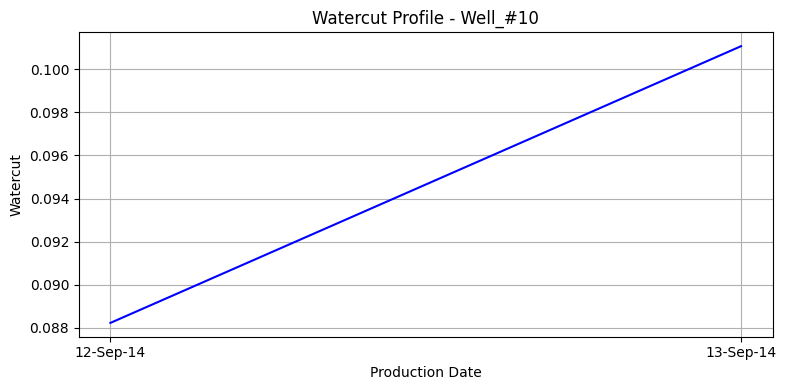

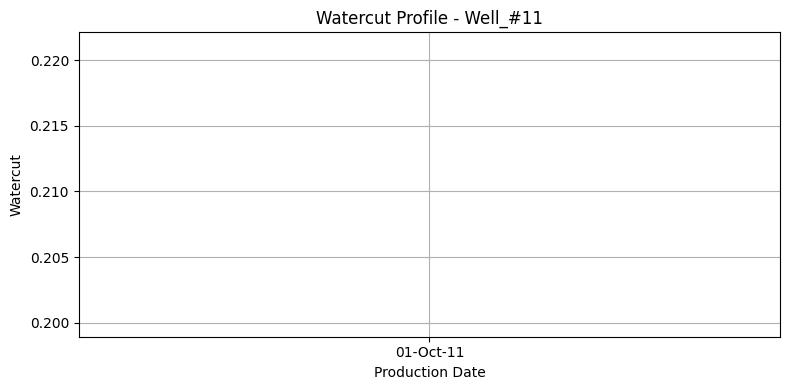

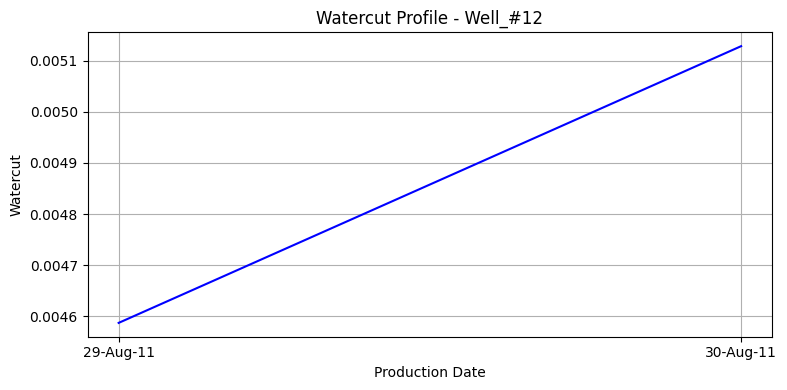

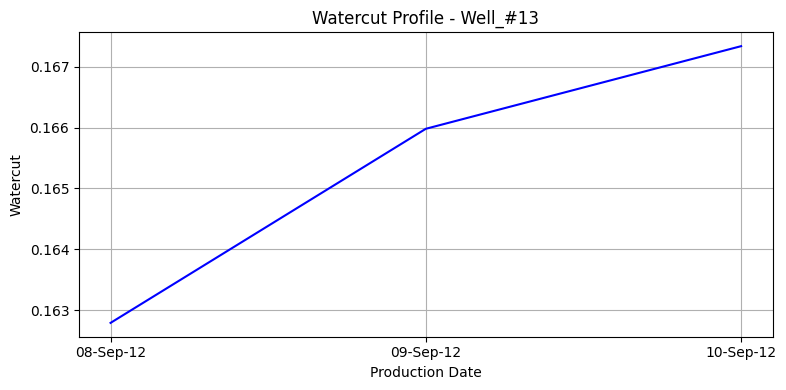

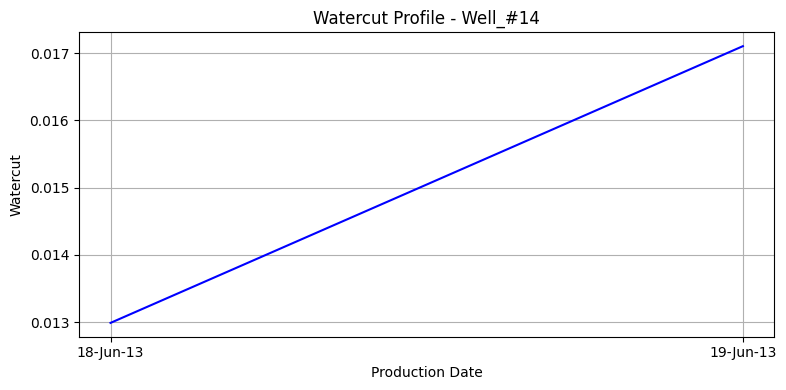

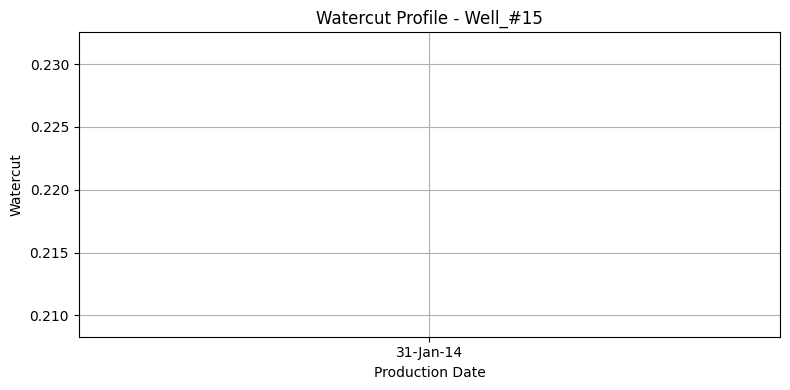

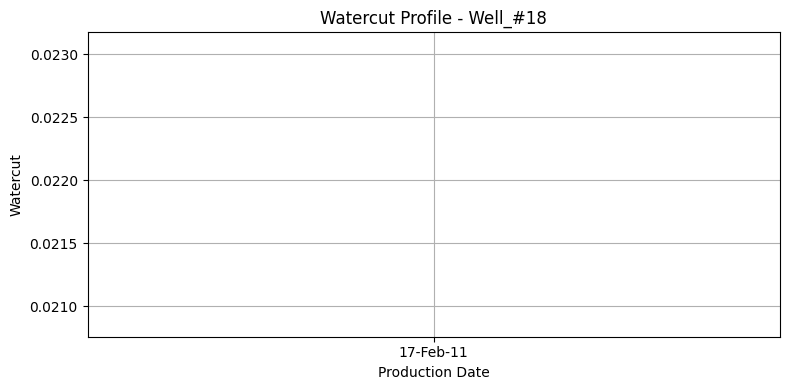

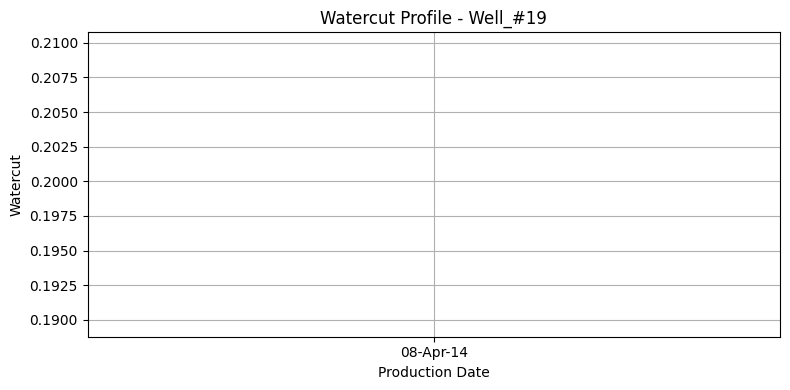

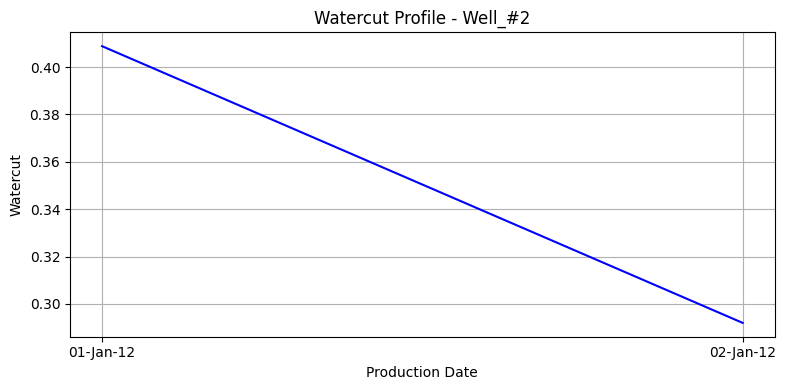

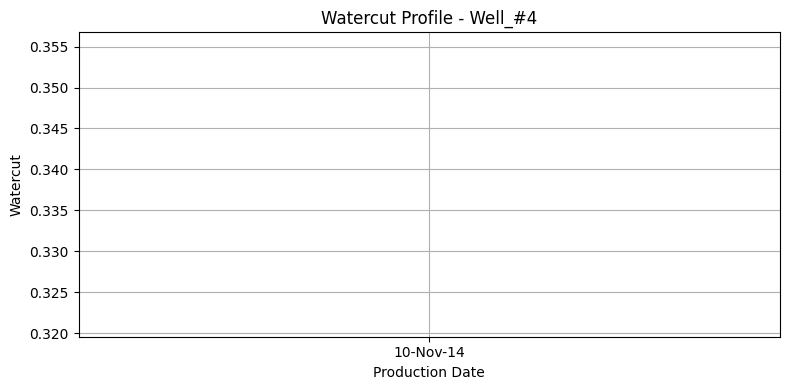

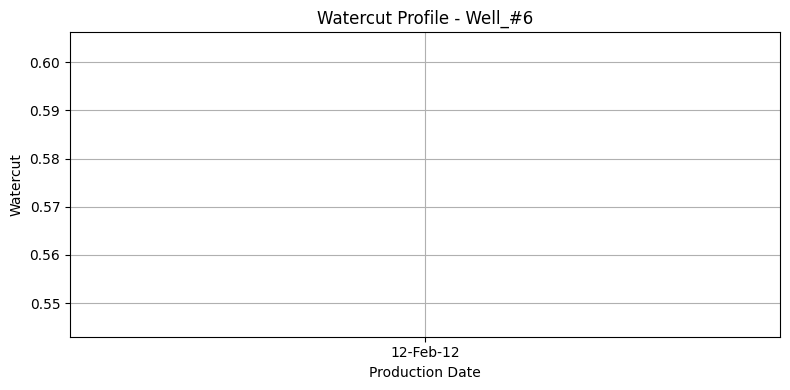

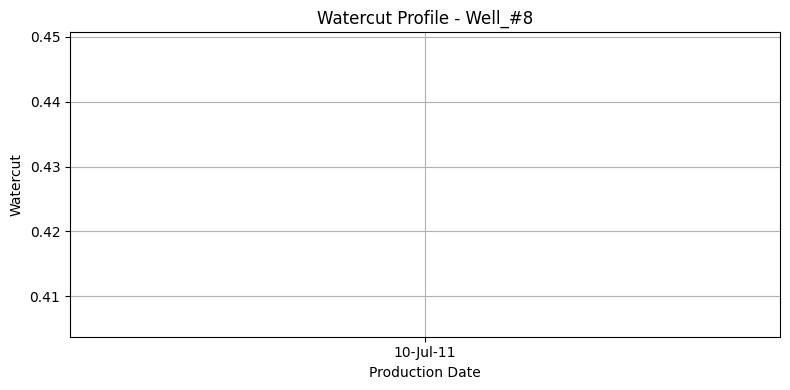

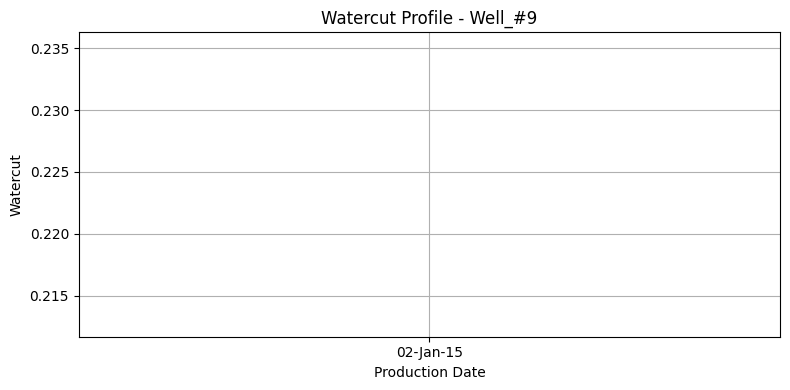

In [ ]:
for well, group in valid_wc_df.groupby('WELL_NAME'):
    plt.figure(figsize=(8, 4))
    plt.plot(group['PROD_DATE'], group['WATERCUT'], color='blue')
    plt.title(f'Watercut Profile - {well}')
    plt.xlabel('Production Date')
    plt.ylabel('Watercut')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

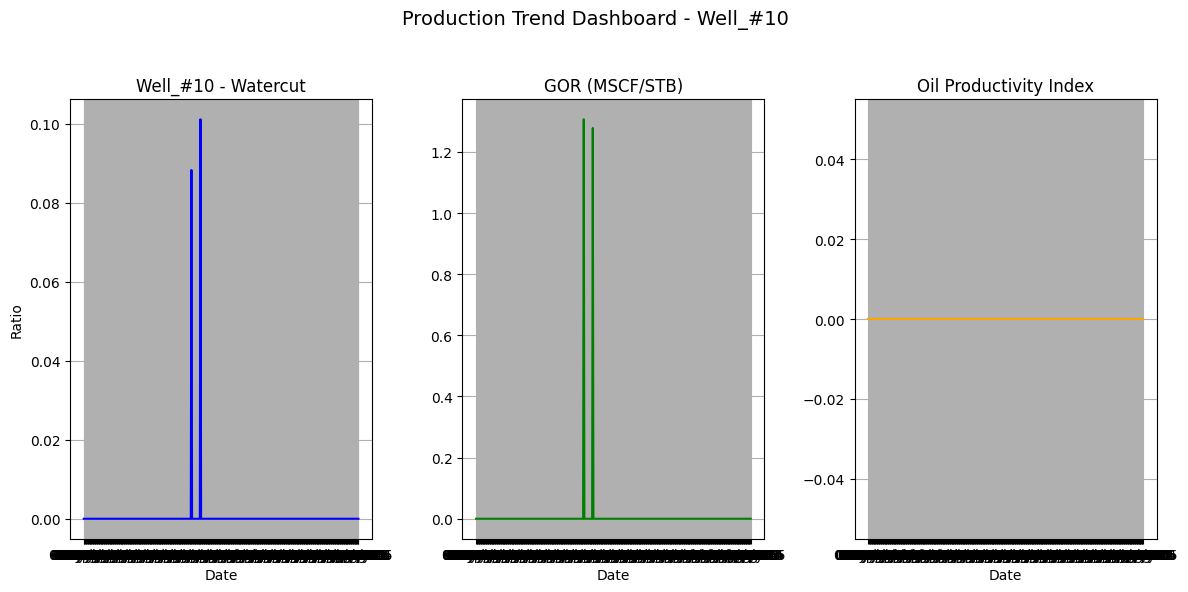

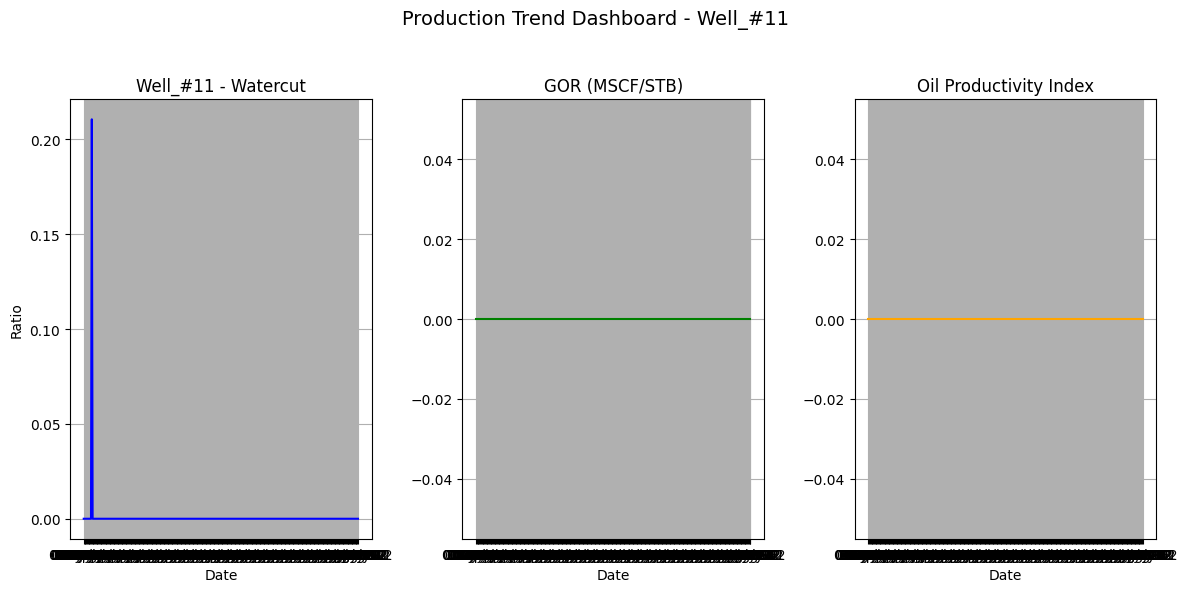

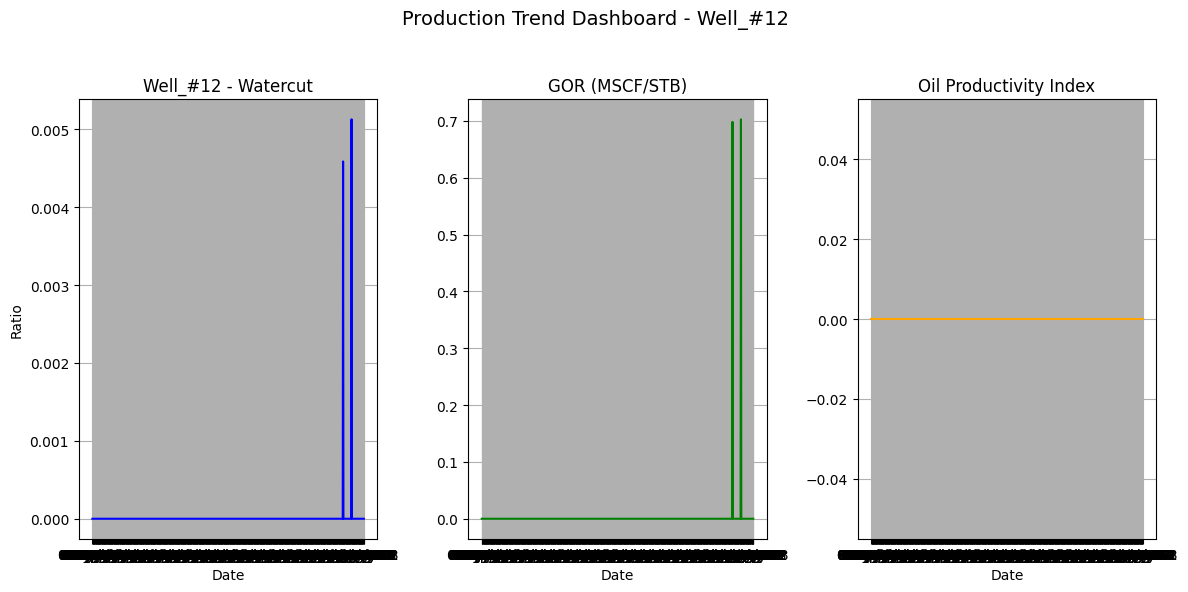

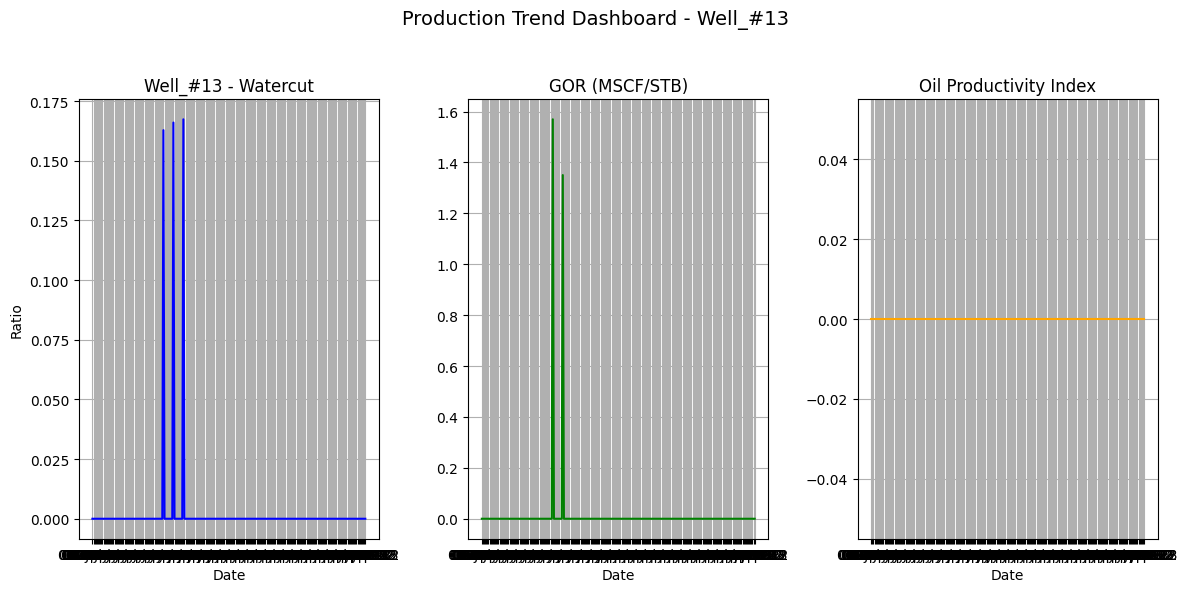

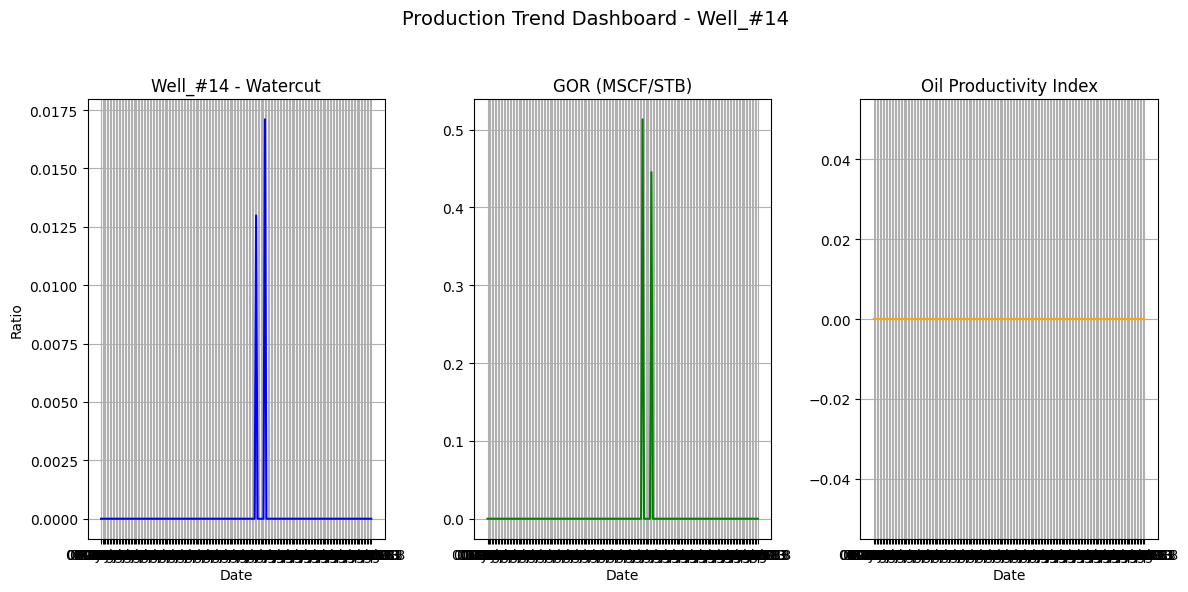

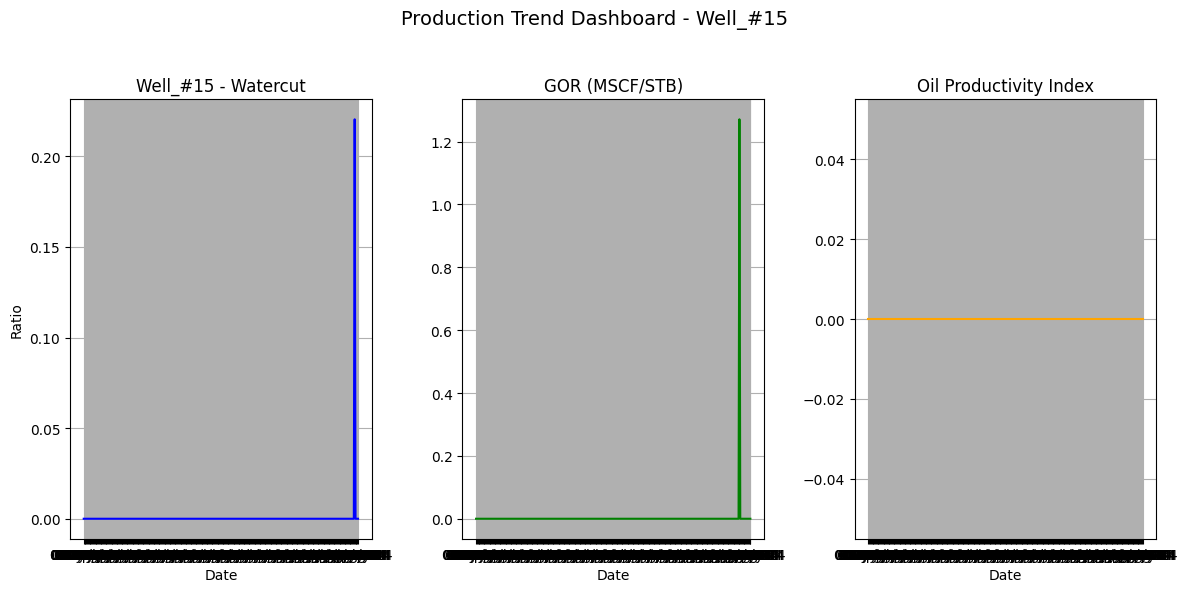

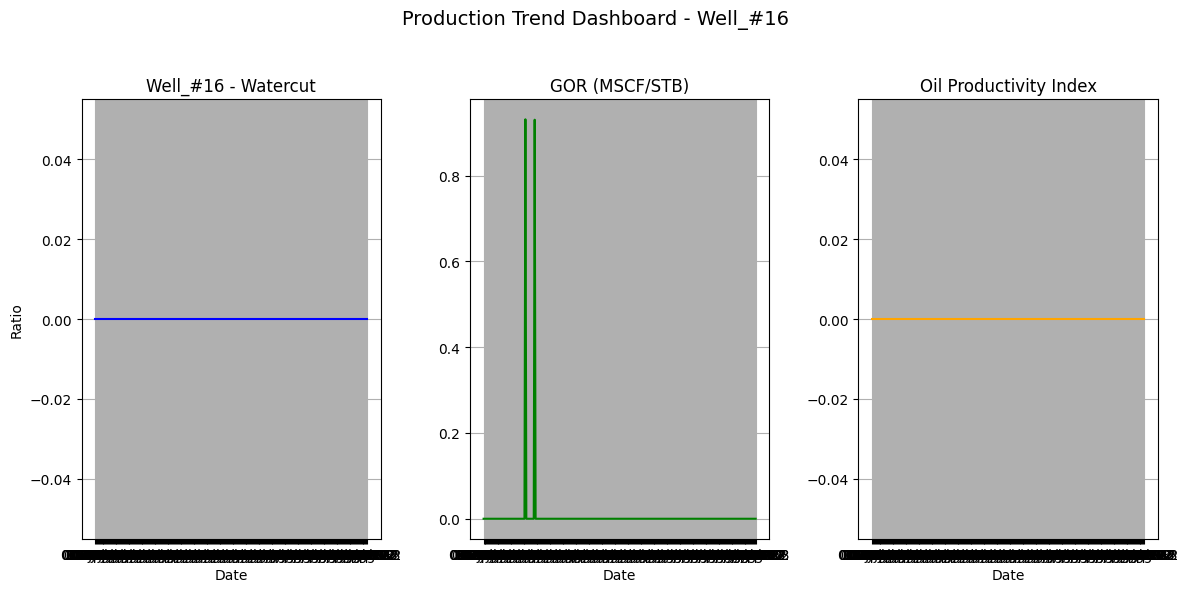

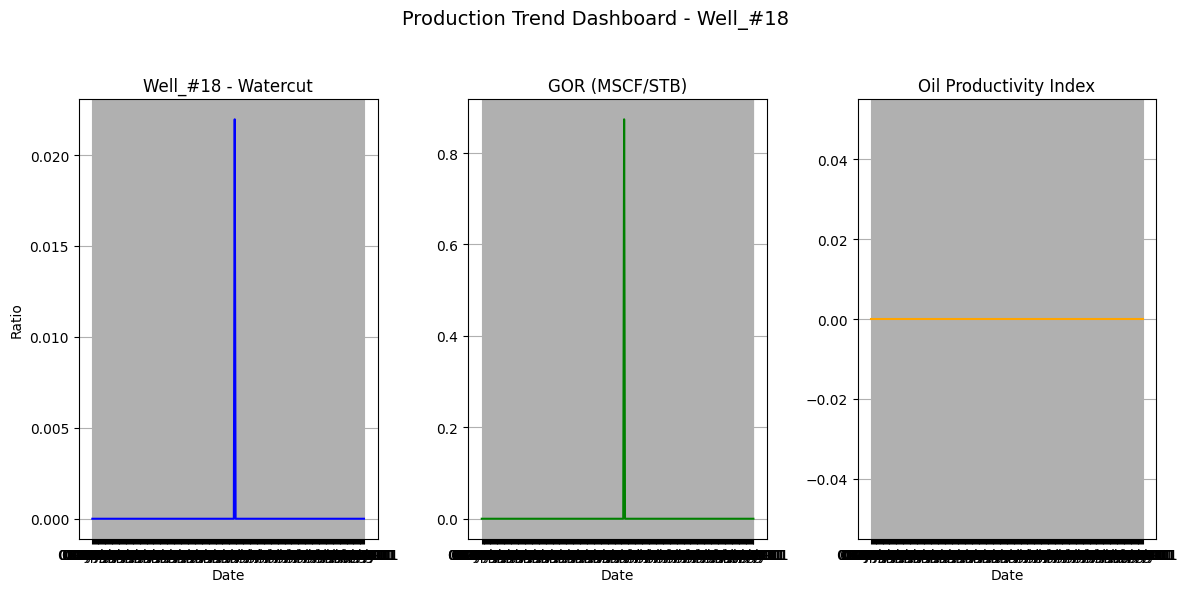

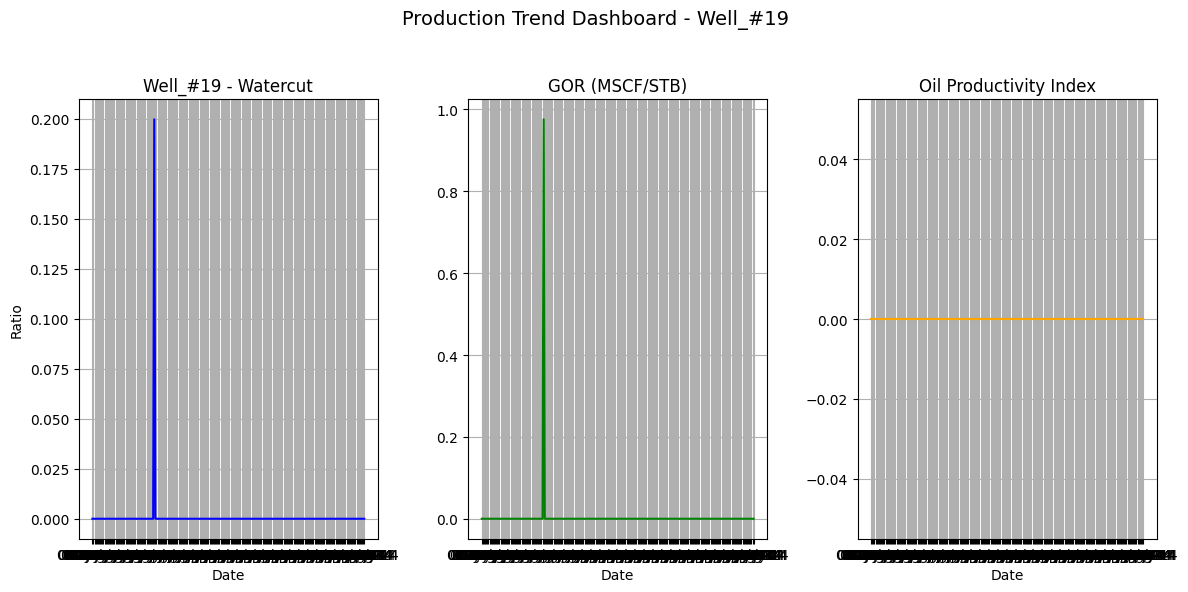

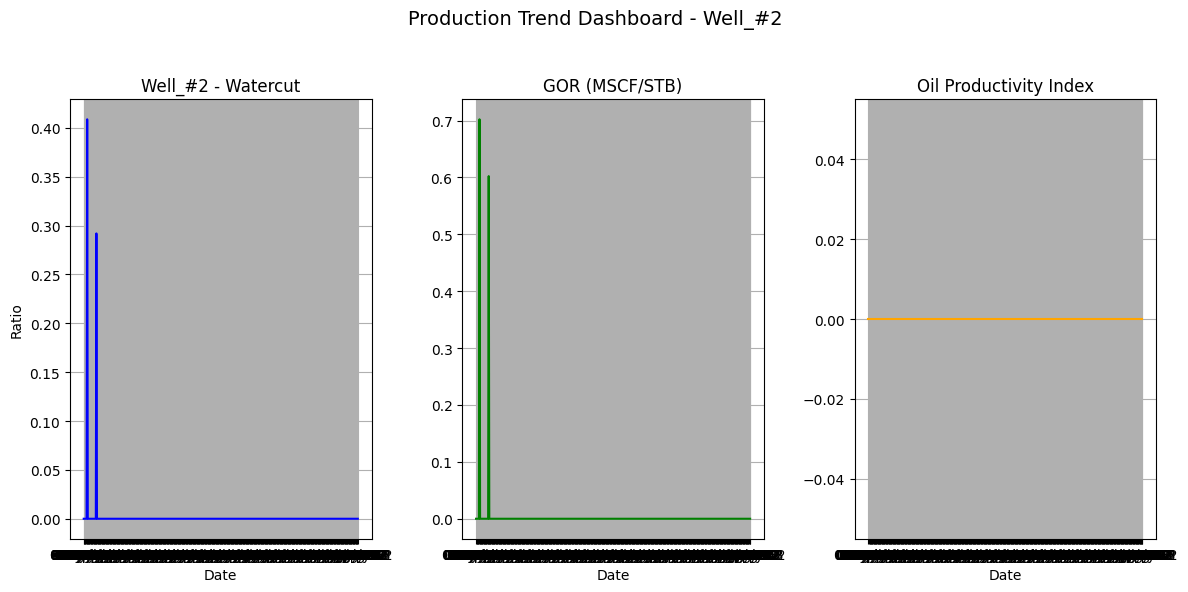

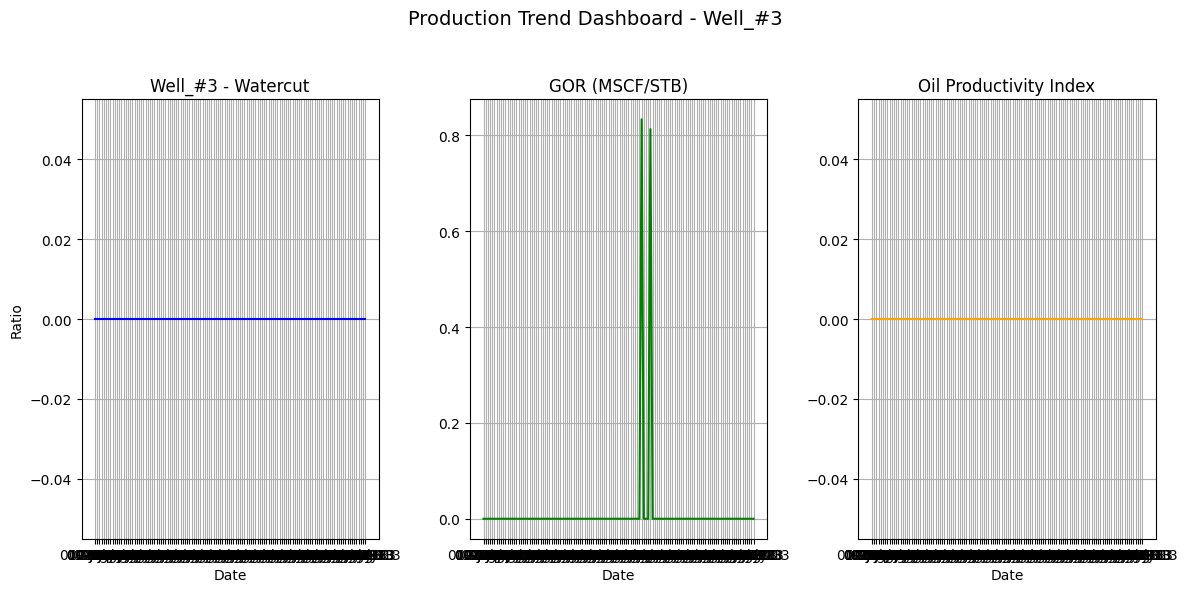

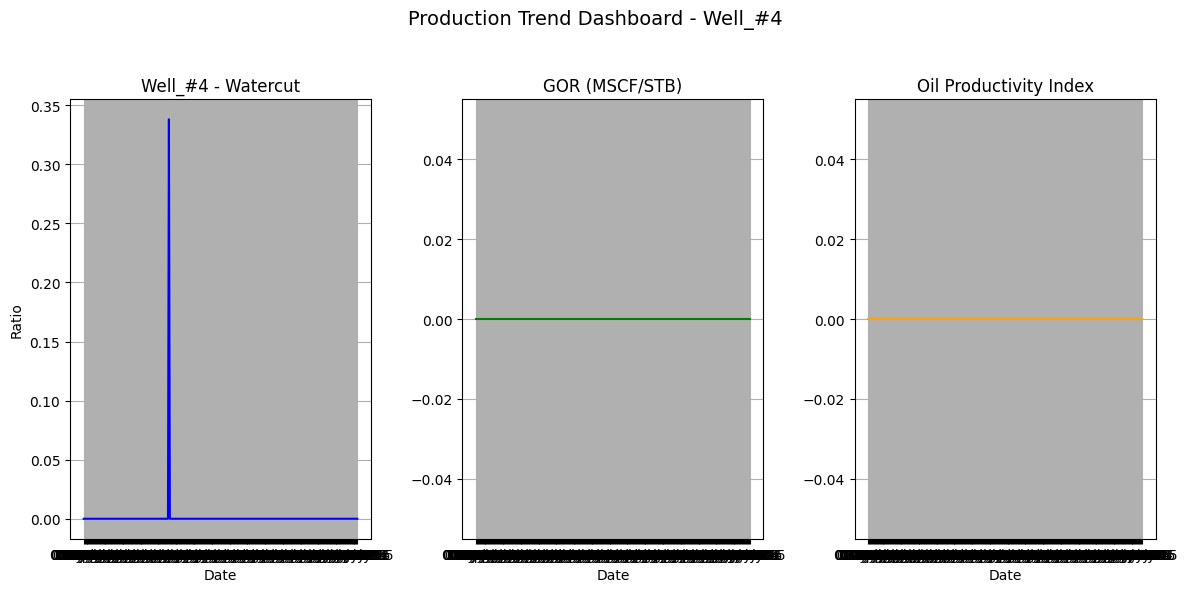

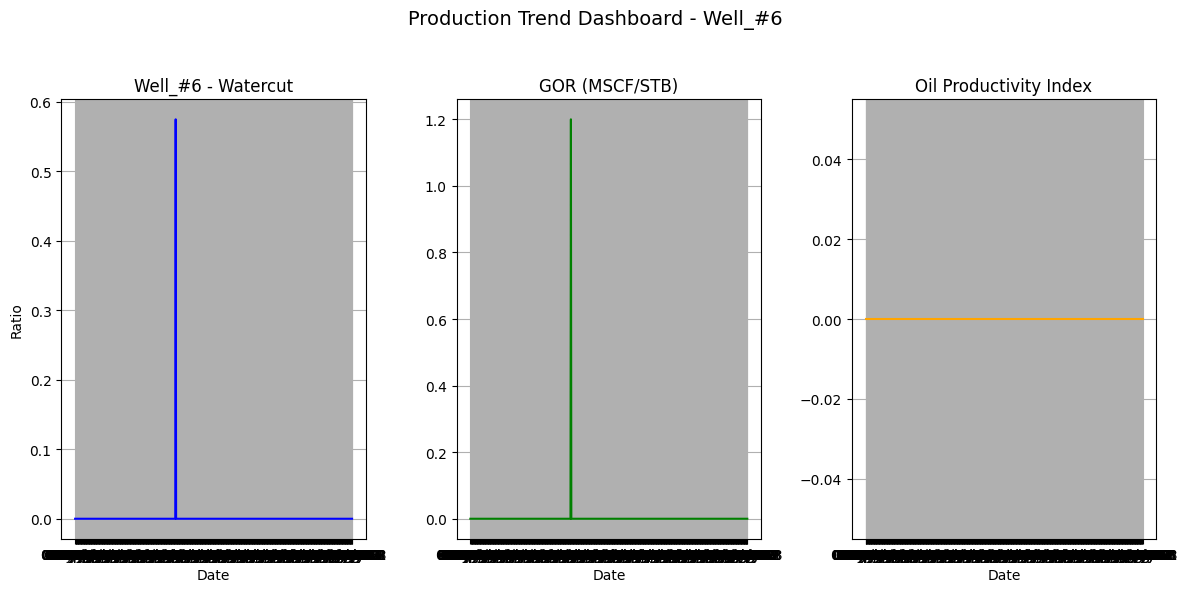

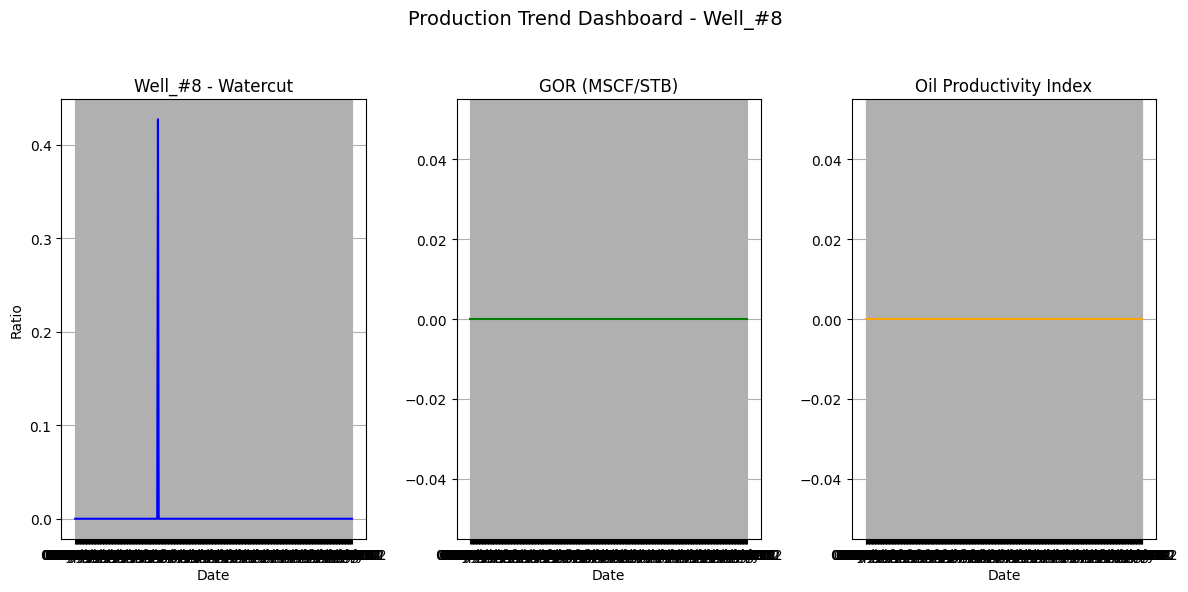

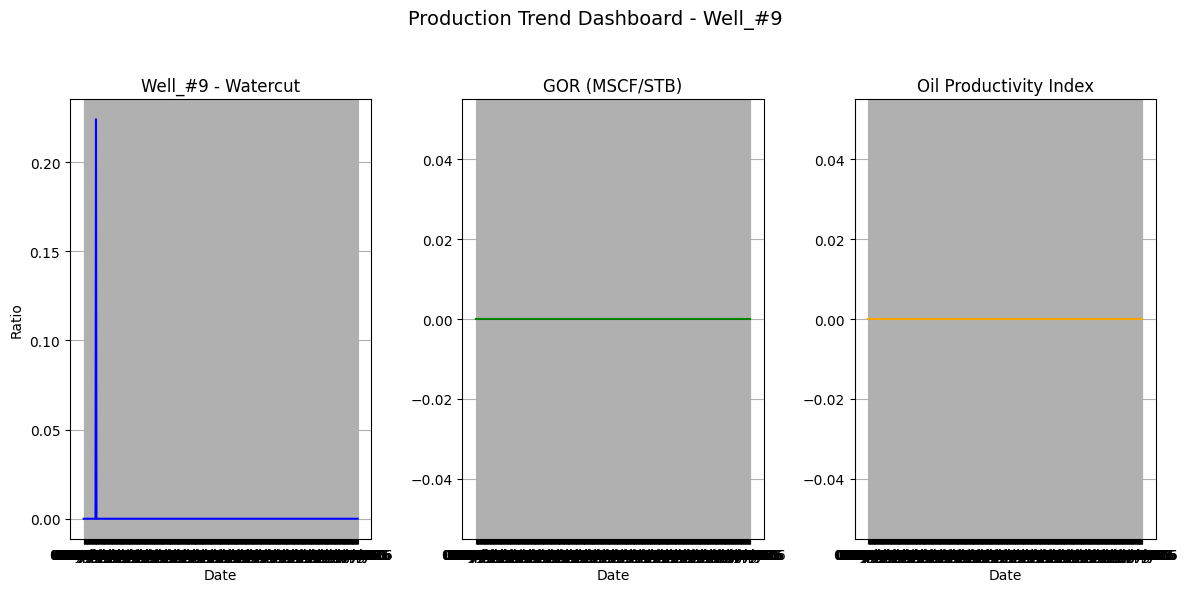

In [ ]:
import matplotlib.pyplot as plt

# Define key signal colors
colors = {
    'WATERCUT': 'blue',
    'GOR': 'green',
    'OIL_PRODUCTIVITY_INDEX': 'orange'
}

# Loop through wells with valid production data
for well, group in wells_df.groupby('WELL_NAME'):
    group = group.sort_values('PROD_DATE')

    # Skip empty wells
    if group['CUMULATIVE_OIL_PROD_(STB)'].sum() == 0:
        continue

    plt.figure(figsize=(12, 6))

    # Watercut subplot
    plt.subplot(1, 3, 1)
    plt.plot(group['PROD_DATE'], group['WATERCUT'], color=colors['WATERCUT'])
    plt.title(f'{well} - Watercut')
    plt.xlabel('Date')
    plt.ylabel('Ratio')
    plt.grid(True)

    # GOR subplot
    plt.subplot(1, 3, 2)
    plt.plot(group['PROD_DATE'], group['GOR'], color=colors['GOR'])
    plt.title('GOR (MSCF/STB)')
    plt.xlabel('Date')
    plt.grid(True)

    # PI subplot
    plt.subplot(1, 3, 3)
    plt.plot(group['PROD_DATE'], group['OIL_PRODUCTIVITY_INDEX'], color=colors['OIL_PRODUCTIVITY_INDEX'])
    plt.title('Oil Productivity Index')
    plt.xlabel('Date')
    plt.grid(True)

    plt.suptitle(f'Production Trend Dashboard - {well}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [ ]:
# Ensure numeric types first
wells_df['CUMULATIVE_OIL_PROD_(STB)'] = pd.to_numeric(
    wells_df['CUMULATIVE_OIL_PROD_(STB)'], errors='coerce'
)
wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'] = pd.to_numeric(
    wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'], errors='coerce'
)

# Compute PI safely
wells_df['OIL_PRODUCTIVITY_INDEX'] = wells_df['CUMULATIVE_OIL_PROD_(STB)'] / wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)']
wells_df['OIL_PRODUCTIVITY_INDEX'] = wells_df['OIL_PRODUCTIVITY_INDEX'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [ ]:
%matplotlib inline

In [ ]:
print(group[['PROD_DATE', 'OIL_PRODUCTIVITY_INDEX']])

Empty DataFrame
Columns: [PROD_DATE, OIL_PRODUCTIVITY_INDEX]
Index: []


In [ ]:
wells_df['PROD_DATE'] = pd.to_datetime(wells_df['PROD_DATE'], errors='coerce')

/tmp/ipython-input-136-2704981644.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wells_df['PROD_DATE'] = pd.to_datetime(wells_df['PROD_DATE'], errors='coerce')


In [ ]:
group = wells_df[wells_df['WELL_NAME'] == 'WELL-001'].sort_values('PROD_DATE')
print(group['OIL_PRODUCTIVITY_INDEX'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: OIL_PRODUCTIVITY_INDEX, dtype: float64


In [ ]:
wells_df['CUMULATIVE_OIL_PROD_(STB)'] = pd.to_numeric(
    wells_df['CUMULATIVE_OIL_PROD_(STB)'], errors='coerce'
)
wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'] = pd.to_numeric(
    wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'], errors='coerce'
)

In [ ]:
valid_mask = wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'] > 0
wells_df = wells_df[valid_mask]

In [ ]:
wells_df['OIL_PRODUCTIVITY_INDEX'] = wells_df['CUMULATIVE_OIL_PROD_(STB)'] / wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)']
wells_df['OIL_PRODUCTIVITY_INDEX'] = wells_df['OIL_PRODUCTIVITY_INDEX'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [ ]:
print(wells_df['OIL_PRODUCTIVITY_INDEX'].describe())

count    8.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: OIL_PRODUCTIVITY_INDEX, dtype: float64


In [ ]:
# Re-import numeric columns cleanly
wells_df['CUMULATIVE_OIL_PROD_(STB)'] = pd.to_numeric(
    wells_df['CUMULATIVE_OIL_PROD_(STB)'], errors='coerce'
)
wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'] = pd.to_numeric(
    wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'], errors='coerce'
)

# Recalculate PI without filtering
wells_df['OIL_PRODUCTIVITY_INDEX'] = wells_df['CUMULATIVE_OIL_PROD_(STB)'] / wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)']
wells_df['OIL_PRODUCTIVITY_INDEX'] = wells_df['OIL_PRODUCTIVITY_INDEX'].replace([np.inf, -np.inf], np.nan)

In [ ]:
print(wells_df['OIL_PRODUCTIVITY_INDEX'].describe())

count    1.0
mean     0.0
std      NaN
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: OIL_PRODUCTIVITY_INDEX, dtype: float64


In [ ]:
print(wells_df.columns.tolist())

['PROD_DATE', 'WELL_NAME', 'ON_STREAM_HRS', 'BOTTOMHOLE_FLOWING_PRESSURE_(PSI)', 'DOWNHOLE_TEMPERATURE_(DEG_F)', 'ANNULUS_PRESS_(PSI)', 'CHOKE_SIZE_(%)', 'WELL_HEAD_PRESSURE_(PSI)', 'WELL_HEAD_TEMPERATURE_(DEG_F)', 'CUMULATIVE_OIL_PROD_(STB)', 'CUMULATIVE_FORMATION_GAS_PROD_(MSCF)', 'CUMULATIVE_TOTAL_GAS_PROD_(MSCF)', 'CUMULATIVE_WATER_PROD_(BBL)', 'WELL_ID', 'WELL', 'RESERVOIR_NAME', 'RESERVOIR_TYPE', 'WELL_TYPE', 'PRODUCTION_TYPE', 'FORMATION_GOR_TREND', 'WATERCUT_TREND', 'OIL_PRODUCTIVITY_INDEX', 'FVF', 'OIL_IN_BARRELS', 'WATERCUT', 'GOR']


In [ ]:
wells_df['OIL_RATE_EST'] = wells_df['CUMULATIVE_OIL_PROD_(STB)'].diff() / wells_df['ON_STREAM_HRS']

In [ ]:
wells_df['PI_EST'] = wells_df['OIL_RATE_EST'] / wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)']
wells_df['PI_EST'] = wells_df['PI_EST'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [ ]:
# Ensure numeric types
wells_df['ON_STREAM_HRS'] = pd.to_numeric(wells_df['ON_STREAM_HRS'], errors='coerce')
wells_df['CUMULATIVE_OIL_PROD_(STB)'] = pd.to_numeric(wells_df['CUMULATIVE_OIL_PROD_(STB)'], errors='coerce')
wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'] = pd.to_numeric(wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'], errors='coerce')

# Estimate oil rate (simple diff per hour)
wells_df['OIL_RATE_EST'] = wells_df.groupby('WELL_NAME')['CUMULATIVE_OIL_PROD_(STB)'].diff() / wells_df['ON_STREAM_HRS']

# Compute PI from estimated rate and drawdown pressure
wells_df['PI_EST'] = wells_df['OIL_RATE_EST'] / wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)']
wells_df['PI_EST'] = wells_df['PI_EST'].replace([np.inf, -np.inf], np.nan).fillna(0)

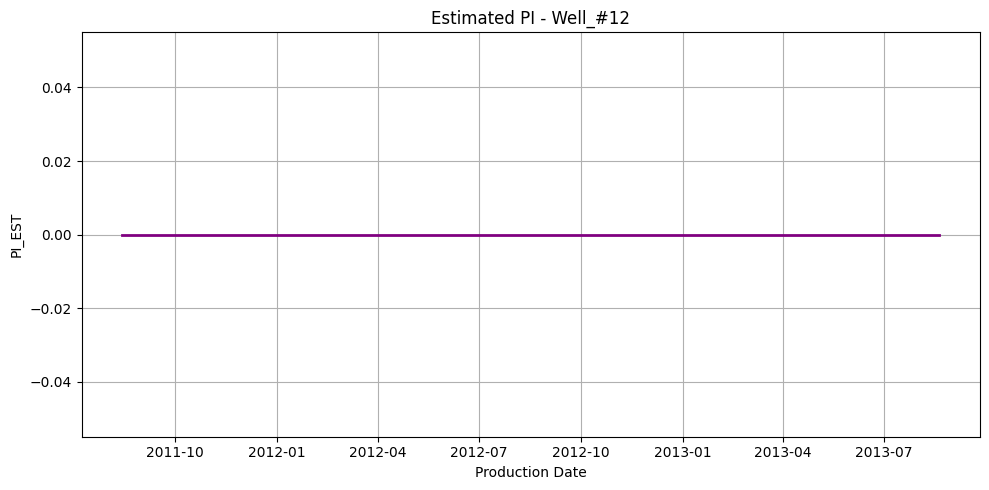

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

sample_well = wells_df['WELL_NAME'].iloc[0]
group = wells_df[wells_df['WELL_NAME'] == sample_well].sort_values('PROD_DATE')

plt.figure(figsize=(10, 5))
plt.plot(group['PROD_DATE'], group['PI_EST'], color='purple', linewidth=2)
plt.title(f'Estimated PI - {sample_well}')
plt.xlabel('Production Date')
plt.ylabel('PI_EST')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Group by WELL_NAME to improve per-well calculation
wells_df['OIL_RATE_EST'] = wells_df.groupby('WELL_NAME')['CUMULATIVE_OIL_PROD_(STB)'].diff()

# Convert hours to days if needed (assuming ON_STREAM_HRS is total per day)
wells_df['ON_STREAM_DAYS'] = wells_df['ON_STREAM_HRS'] / 24

# Avoid division by zero
wells_df['ON_STREAM_DAYS'] = wells_df['ON_STREAM_DAYS'].replace(0, np.nan)

# Estimate rate in STB/day
wells_df['OIL_RATE_EST'] = wells_df['OIL_RATE_EST'] / wells_df['ON_STREAM_DAYS']

# Compute PI
wells_df['PI_EST'] = wells_df['OIL_RATE_EST'] / wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)']
wells_df['PI_EST'] = wells_df['PI_EST'].replace([np.inf, -np.inf], np.nan).fillna(0)

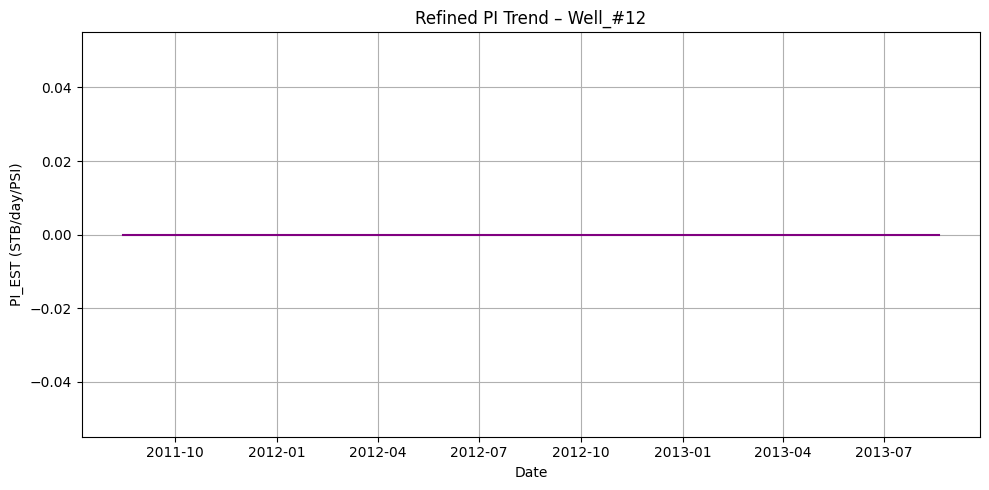

In [ ]:
sample_well = wells_df['WELL_NAME'].iloc[0]
group = wells_df[wells_df['WELL_NAME'] == sample_well].sort_values('PROD_DATE')

plt.figure(figsize=(10, 5))
plt.plot(group['PROD_DATE'], group['PI_EST'], color='purple')
plt.title(f'Refined PI Trend – {sample_well}')
plt.xlabel('Date')
plt.ylabel('PI_EST (STB/day/PSI)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
wells_df['OIL_RATE_EST'] = wells_df.groupby('WELL_NAME')['CUMULATIVE_OIL_PROD_(STB)'].diff() / wells_df['ON_STREAM_DAYS']

In [ ]:
wells_df['ON_STREAM_DAYS'] = wells_df['ON_STREAM_HRS'] / 24
wells_df['ON_STREAM_DAYS'] = wells_df['ON_STREAM_DAYS'].replace(0, np.nan)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse production date
wells_df['PROD_DATE'] = pd.to_datetime(wells_df['PROD_DATE'], errors='coerce')

# Ensure numeric types
wells_df['ON_STREAM_HRS'] = pd.to_numeric(wells_df['ON_STREAM_HRS'], errors='coerce')
wells_df['CUMULATIVE_OIL_PROD_(STB)'] = pd.to_numeric(wells_df['CUMULATIVE_OIL_PROD_(STB)'], errors='coerce')
wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'] = pd.to_numeric(wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)'], errors='coerce')

# Convert hours to days
wells_df['ON_STREAM_DAYS'] = wells_df['ON_STREAM_HRS'] / 24
wells_df['ON_STREAM_DAYS'] = wells_df['ON_STREAM_DAYS'].replace(0, np.nan)

# Estimate oil rate per day
wells_df['OIL_RATE_EST'] = wells_df.groupby('WELL_NAME')['CUMULATIVE_OIL_PROD_(STB)'].diff() / wells_df['ON_STREAM_DAYS']

# Estimate PI
wells_df['PI_EST'] = wells_df['OIL_RATE_EST'] / wells_df['BOTTOMHOLE_FLOWING_PRESSURE_(PSI)']
wells_df['PI_EST'] = wells_df['PI_EST'].replace([np.inf, -np.inf], np.nan).fillna(0)

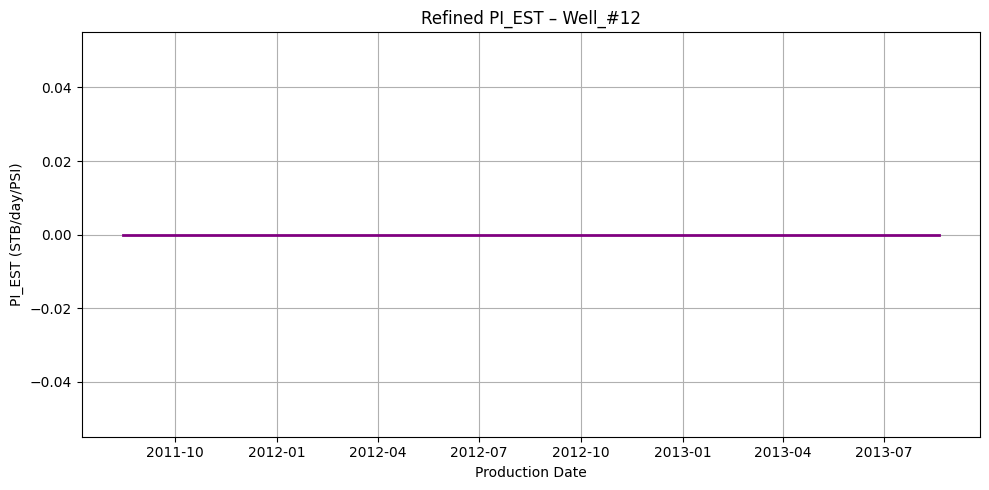

In [ ]:
sample_well = wells_df['WELL_NAME'].iloc[0]  # Or set manually
group = wells_df[wells_df['WELL_NAME'] == sample_well].sort_values('PROD_DATE')

plt.figure(figsize=(10, 5))
plt.plot(group['PROD_DATE'], group['PI_EST'], color='purple', linewidth=2)
plt.title(f'Refined PI_EST – {sample_well}')
plt.xlabel('Production Date')
plt.ylabel('PI_EST (STB/day/PSI)')
plt.grid(True)
plt.tight_layout()
plt.show()